In [46]:
locals().clear() #clear workspace

# Libaries

In [47]:
import dplpy as dpl
from simplesignalfree import ssf
import matplotlib.pyplot as plt

# Porting work

In [48]:
file = "../tests/data/rwl/nc004.rwl"

data = dpl.readers(file) 


Attempting to read input file: nc004.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['110011', '110031', '110032', '110081', '110091', '110092', '110111', '110112', '110121', '110131', '110132', '110151', '110152', '110161', '110162', '110191', '110201', '110231', '110232', '110241', '110242', '110251', '110252', '110261', '110271', '110272', '110291', '110311', '110331', '110351'] 



In [49]:
finalChron = ssf(file, method="Spline", difference=True)
#finalChron = ssf(file, method="Spline", difference=False)
#finalChron = ssf(file, method="Age", difference=True)
#finalChron = ssf(file, method="Age", difference=False)

Input data needs to be a rwl DataFrame. Attempting to coerce.

Attempting to read input file: nc004.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['110011', '110031', '110032', '110081', '110091', '110092', '110111', '110112', '110121', '110131', '110132', '110151', '110152', '110161', '110162', '110191', '110201', '110231', '110232', '110241', '110242', '110251', '110252', '110261', '110271', '110272', '110291', '110311', '110331', '110351'] 

Data read. First iteration done.
Iteration: 2  Median Abs Diff: 0.00349  (14.32928% of threshold)
Iteration: 3  Median Abs Diff: 0.00191  (26.12564% of threshold)
Iteration: 4  Median Abs Diff: 0.00137  (36.62003% of threshold)
Iteration: 5  Median Abs Diff: 0.00093  (53.69086% of threshold)
Iteration: 6  Median Abs Diff: 0.00066  (75.23159% of threshold)
Iteration: 7  Median Abs Diff: 0.00051  (98.33308% of threshold)
Iteration: 8  Median Abs Diff: 0.00039  (127.38226% of threshold)
Simple Signal Free Chronology Complete


In [50]:

# Plots the data created by the chronology
def plot_chron(years, depths, means, whitened_means):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()

    if whitened_means != None:
        y_val = whitened_means
        y_label = "Mean Res"
    else:
        y_val = means
        y_label = "Mean RWI"

    # make plot of RWI means
    ax.plot(years, y_val, "k-")
    ax.set_xlabel("Year", fontsize = 14)
    ax.set_ylabel(y_label, fontsize=14)

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make plot of sample depths
    ax2.fill_between(years, depths, color=((0.2, 0.6, 0.9, 0.3)))
    ax2.set_ylabel("Sample depth",fontsize=14)
    fig.set_size_inches(14, 8)
    plt.show()

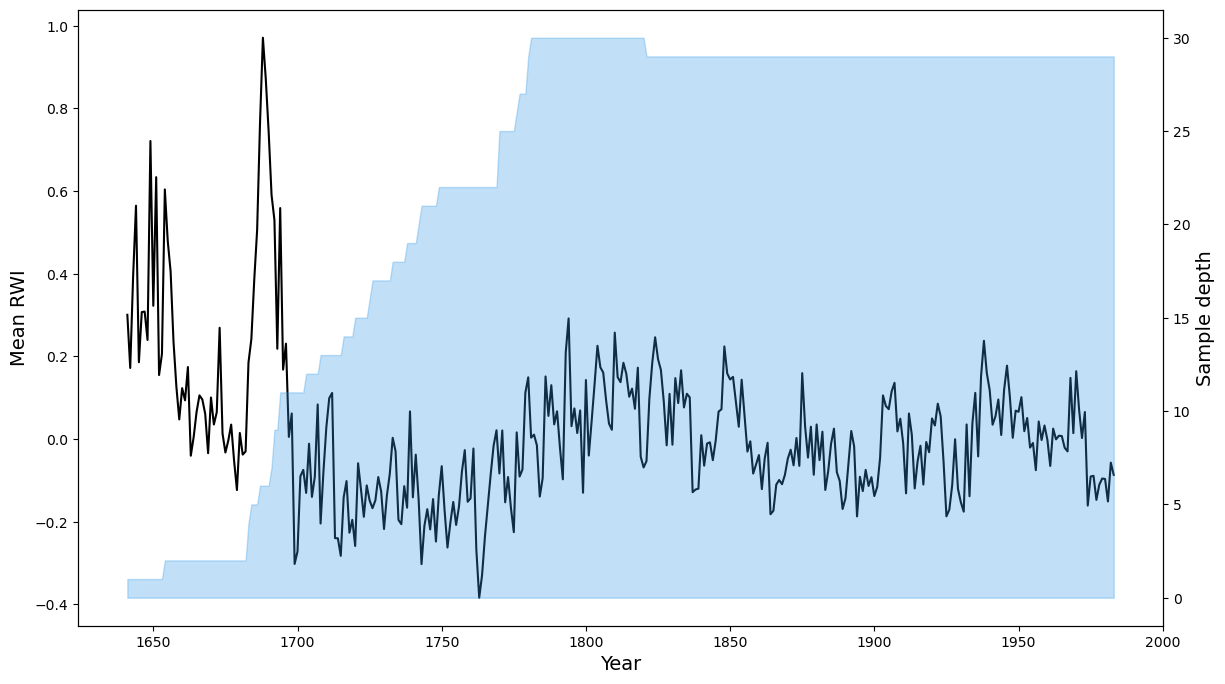

In [51]:
plot_chron(finalChron.index.values, finalChron["samp.depth"], finalChron["sfc"], None)